## Titanic Disaster Survival

## Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

## Data Gathering

In [2]:
titanic_data = pd.read_csv(r"E:\Data-py\VVV\raw__data__raw\titanic.csv")
titanic_data

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_data.index

RangeIndex(start=0, stop=891, step=1)

In [5]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

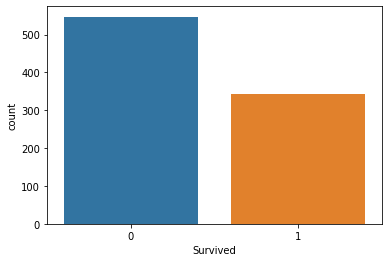

In [7]:
#countplot of survival  vs not survived

sns.countplot(x = "Survived",data = titanic_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

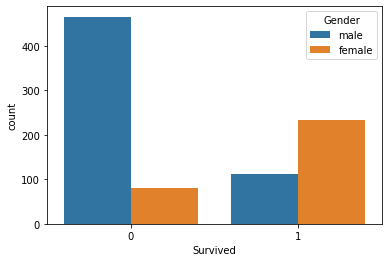

In [8]:
#male and female survived

sns.countplot(x="Survived",data = titanic_data,hue= "Gender")

In [9]:
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

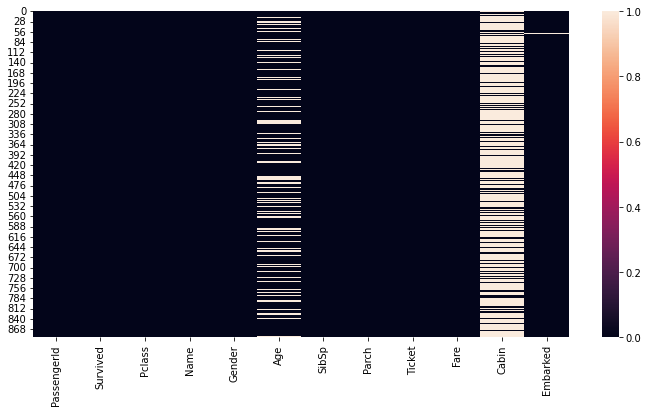

In [10]:
#visualising the null values

plt.figure(figsize=(12,6))
sns.heatmap(titanic_data.isna())
plt.show()

In [11]:
# percentage of null values in Age Cabin Embarked

age = (titanic_data["Age"].isna().sum()/len(titanic_data["Age"]))*100
print(age)
print()
cabin = (titanic_data["Cabin"].isna().sum()/len(titanic_data["Cabin"]))*100
print(cabin)
print()
emba = (titanic_data["Embarked"].isna().sum()/len(titanic_data["Embarked"]))*100
print(emba)
print()

19.865319865319865

77.10437710437711

0.22446689113355783



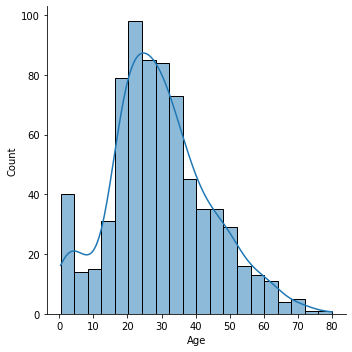

In [12]:
sns.displot(x ="Age",data = titanic_data,kde= True)

## data cleaning

In [13]:
#fill age columns
titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace = True)

In [14]:
titanic_data["Age"].isna().sum()

0

In [15]:
#cabin
titanic_data.drop("Cabin",axis=1,inplace=True)

In [16]:
titanic_data.sample(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,29.699118,0,0,112379,39.60,C
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.000000,0,0,C 7076,7.25,S


In [17]:
# check for non-numeric columns
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


non numeric : Name,Gender,Ticket,Embarked
Name,Ticket,Embarked are not useful for prediction.

In [18]:
#converting gender column to numerical values
pd.get_dummies(titanic_data["Gender"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [19]:
gender = pd.get_dummies(titanic_data["Gender"],drop_first=True)
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [20]:
titanic_data["gender"] = gender
titanic_data.sample(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,gender
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0,S,0
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5,S,0


In [21]:
#drop the columns which are not required
titanic_data.drop(["Name","Gender","Ticket","Embarked"],axis=1,inplace=True)

In [22]:
titanic_data.sample(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender
282,283,0,3,16.0,0,0,9.5000,1
103,104,0,3,33.0,0,0,8.6542,1
705,706,0,2,39.0,0,0,26.0000,1


In [23]:
# split features and label

x = titanic_data.drop("Survived",axis =1)
y = titanic_data["Survived"]

In [24]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,gender
0,1,3,22.000000,1,0,7.2500,1
1,2,1,38.000000,1,0,71.2833,0
2,3,3,26.000000,0,0,7.9250,0
3,4,1,35.000000,1,0,53.1000,0
4,5,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,1
887,888,1,19.000000,0,0,30.0000,0
888,889,3,29.699118,1,2,23.4500,0
889,890,1,26.000000,0,0,30.0000,1


## Data Modelling

In [26]:
#split data in train and test 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=11)

In [29]:
lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [30]:
#predict

y_pred = lr.predict(x_test)

In [35]:
#testing
pd.DataFrame(confusion_matrix(y_test,y_pred),columns=["Pred NO","Pred Yes"],index= ["Actual NO","Actual Yes"])

,Pred NO,Pred Yes
Actual NO,157,19
Actual Yes,25,67


<AxesSubplot:>

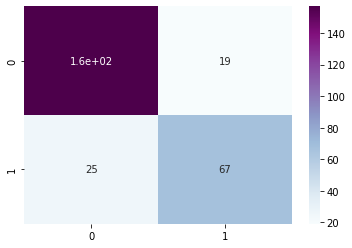

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True, cmap= "BuPu")

In [37]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       176
           1       0.78      0.73      0.75        92

    accuracy                           0.84       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.84      0.83       268



*Accuracy can be increased by further doing feature engineering*